# Effect of weather on Formula 1, a broad analysis

## Introduction

The objective of this project is to determine whether or not variables such as temperature, track temperature and humidity etc may effect track fastest lap speeds, times and total laps completed.

Data is analysed from five tracks over four different seasons, from 2016 to 2019.

* Silverstone, Britain
* Albert Park, Melbourne
* Interlagos, Brazil
* Catalunya, Spain
* De spa, Belgium

Table of contents:

Overview section
* Data Preparation
* Some other section
* Another section

## Data Preparation

### Preliminaries

In [70]:
# Module Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# Read invididual data files
races = pd.read_csv('data/formula-1/races.csv', sep = ',')
results = pd.read_csv('data/formula-1/results.csv', sep = ',')
track_weather = pd.read_csv('data/track_weather.csv', sep = ',')

# Merge data (on raceID & date)
data_raw = races.merge(results, on = 'raceId').merge(track_weather, on = 'date')

# Clean data (4620, 20) 204
df = data_raw.drop(columns = ['url', 'year', 'round', 'circuitId', 'time_x', 'constructorId', 'number', 'grid', 'position', 'track', 'positionOrder', 'positionText', 'resultId', 'time_y'])

# Remove '\N' characters (4416, 20)
df = df.replace(r'\\N','null', regex=True) 
df = df.loc[df['fastestLapSpeed'] != 'null']
df['fastestLapSpeed'] = df['fastestLapSpeed'].astype(float)


fastestLapSpeed = df.groupby(['name', 'date'])['fastestLapSpeed'].mean().reset_index()
#fastestLapTime = df.groupby(['name', 'date'])['fastestLapTime'].mean().reset_index()

df = fastestLapSpeed.merge(track_weather, on = 'date')

df = df.loc[df['track'] == 'de-monaco']




In [162]:
df.dtypes

name                object
date                object
fastestLapSpeed    float64
track               object
local_time          object
weather             object
temp               float64
track_temp         float64
humidity           float64
air_pressure       float64
wind_speed         float64
wind_direction      object
dtype: object

In [163]:
df.sample(n = 10, random_state=999)

,name,date,fastestLapSpeed,track,local_time,weather,temp,track_temp,humidity,air_pressure,wind_speed,wind_direction
13,Australian Grand Prix,2009-03-29,214.918895,albert-park,17:00:00,sunny,21.0,27.0,65.0,1020.0,5.0,south
15,Australian Grand Prix,2011-03-27,208.256136,albert-park,17:00:00,slightly cloudy,17.0,20.0,61.0,1025.0,4.0,south
22,Australian Grand Prix,2018-03-25,216.718100,albert-park,16:10:00,slightly cloudy,24.0,36.0,31.0,996.0,4.0,northeast
17,Australian Grand Prix,2013-03-17,210.337571,albert-park,17:00:00,cloudy,17.0,19.0,50.0,1022.0,4.0,south
23,Australian Grand Prix,2019-03-17,216.880850,albert-park,16:10:00,sunny,23.0,40.0,70.0,1015.0,1.5,northwest
18,Australian Grand Prix,2014-03-16,200.978800,albert-park,17:00:00,cloudy,18.0,26.0,46.0,1006.0,8.0,west
20,Australian Grand Prix,2016-03-20,207.407476,albert-park,16:00:00,slightly cloudy,22.0,31.0,46.0,1018.0,4.0,southern
14,Australian Grand Prix,2010-03-28,203.904150,albert-park,17:00:00,"cloudy, occasional rain",26.0,23.0,41.0,1008.0,2.0,west
21,Australian Grand Prix,2017-03-26,215.679800,albert-park,16:00:00,slightly cloudy,24.0,34.0,69.0,1010.0,2.0,northwest
19,Australian Grand Prix,2015-03-15,207.175692,albert-park,17:00:00,slightly cloudy,18.0,34.0,60.0,1015.0,6.0,south


In [3]:

gameData = gameData.drop(columns = ['id', 'Round'])
gameData['Date'] = gameData['Date'].str.split(' ').str[0]

indexNames = gameData[gameData['Venue'] != 'M.C.G.'].index
gameData.drop(indexNames, inplace=True)

gameData['Total.Score'] = gameData['Home.Points'] + gameData['Away.Points']
gameData['Total.Goals'] = gameData['Home.Goals'] + gameData['Away.Goals']
gameData['Total.Behinds'] = gameData['Home.Behinds'] + gameData['Away.Behinds']

# Read & Clean Weather Data

years = ['2015', '2016', '2017', '2018', '2019']
weatherData = pd.read_csv('data/IDCJAC0009_086338_1800_Data.csv', sep = ',')
weatherData = weatherData.loc[weatherData['Year'].isin(years)]
weatherData['Month'] = weatherData['Month'].map(lambda x: str(x).zfill(2))
weatherData['Day'] = weatherData['Day'].map(lambda x: str(x).zfill(2))
weatherData['Date'] = weatherData['Year'].astype(str) + '-' + weatherData['Month'] + '-' + weatherData['Day'].astype(str)
weatherData = weatherData.drop(columns = ['Year', 'Month', 'Day', 'Product code', 'Bureau of Meteorology station number', 'Period over which rainfall was measured (days)', 'Quality'])

# Read & Clean Solar Data

solarData = pd.read_csv('data/IDCJAC0016_086338_1800_Data.csv', sep = ',')
solarData = solarData.loc[solarData['Year'].isin(years)]
solarData['Month'] = solarData['Month'].map(lambda x: str(x).zfill(2))
solarData['Day'] = solarData['Day'].map(lambda x: str(x).zfill(2))
solarData['Date'] = solarData['Year'].astype(str) + '-' + solarData['Month'] + '-' + solarData['Day'].astype(str)
solarData = solarData.drop(columns = ['Year', 'Month', 'Day', 'Product code', 'Bureau of Meteorology station number'])

# Combined Data Sets

data = gameData.merge(weatherData, on = 'Date').merge(solarData, on = 'Date')
data = data.rename(columns = {'Daily global solar exposure (MJ/m*m)': 'solar_exposure', 'Rainfall amount (millimetres)': 'daily_rainfall'})

NameError: name 'gameData' is not defined

## Data Plots

### Basic Scatter Plots

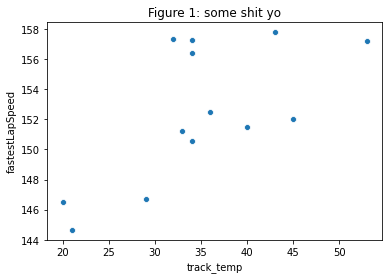

In [216]:
# create scatterplot 
sns.scatterplot(df['track_temp'], df['fastestLapSpeed'])
plt.title('Figure 1: some shit yo')
plt.show();




In [214]:
print("temp: " + str((df.temp).corr(df.fastestLapSpeed)))
print("track_temp: " + str((df.track_temp).corr(df.fastestLapSpeed)))
print("humidity: " + str((df.humidity).corr(df.fastestLapSpeed)))
print("air_pressure: " + str((df.air_pressure).corr(df.fastestLapSpeed)))
print("wind_speed: " + str((df.wind_speed).corr(df.fastestLapSpeed)))

               

temp: 0.8266263621240918
track_temp: 0.6711805459872388
humidity: -0.5583753614677653
air_pressure: 0.1060927956711287
wind_speed: -0.8254507754631096
